 ## Polyrot example usage
 
This notebook provides some brief examples of how polyrot can be used to compute the structure of rotating polytropic bodies. 

### Rigid rotation

The code's primary usage boils down to the instantiation of a user-facing "polyStar" class: 

In [1]:
from polyrot import polyStar
import matplotlib.pyplot as plt

model = polyStar(n=3,    # polytropic index
                 Nr=60,  # number of radial grid-points in an interior spherical domain
                 No=20,  # number of radial grid-points in an exterior vacuum domain
                 Nm=30,  # number of latitudinal grid-points
                 Om=0.4, # constant rotation rate (in units of sqrt[central enthalpy]*equatorial radius
                 verbose=True, # setting to False runs without status updates
                 tol=1e-15,    # tolerance for convergence error (**not** solution error)
                 plot=False    # automatically produces plot on completion (see below)
                )


###########################################################
################## Initializing new model #################
###########################################################


###########################################################
### Solving 1D Lane-Emden equation for initial solution ###
###########################################################

iter 0: lam=4.9503, dlam/lam=3.94e-01, max[resid]=4.31e+00
iter 1: lam=6.2589, dlam/lam=2.09e-01, max[resid]=3.80e+00
iter 2: lam=6.8158, dlam/lam=8.17e-02, max[resid]=1.71e+00
iter 3: lam=6.8954, dlam/lam=1.15e-02, max[resid]=3.10e-01
iter 4: lam=6.8968, dlam/lam=2.07e-04, max[resid]=6.33e-03
iter 5: lam=6.8968, dlam/lam=6.41e-08, max[resid]=2.04e-06
iter 6: lam=6.8968, dlam/lam=6.64e-15, max[resid]=7.39e-13
iter 7: lam=6.8968, dlam/lam=8.74e-18, max[resid]=1.16e-12

###########################################################
#### Starting iteration for 2D solution incl. rotation ####
###########################################

This calculation produces some output (which can be suppressed by setting "verbose=False" in the above) that tells us some things about the model. This polytropic star is rotating at nearly $84\%$ of the dynamical frequeny $\Omega_d=(GM/R_{eq}^3)^{1/2}$ defined by its mass $M$ and equatorial radius $R_{eq}$ (this frequency is slightly distinct from the "mass-shedding limit" at which the star would begin to shed mass at its equator). The final line of output here indicates that the computed model satisfies the Virial theorem to a relatively high degree of accuracy (even with these low resolutions). 

Polyrot includes a basic plotting function (which can be called upon initialization by setting "plot=True") that demonstrates some of the model's characteristics:

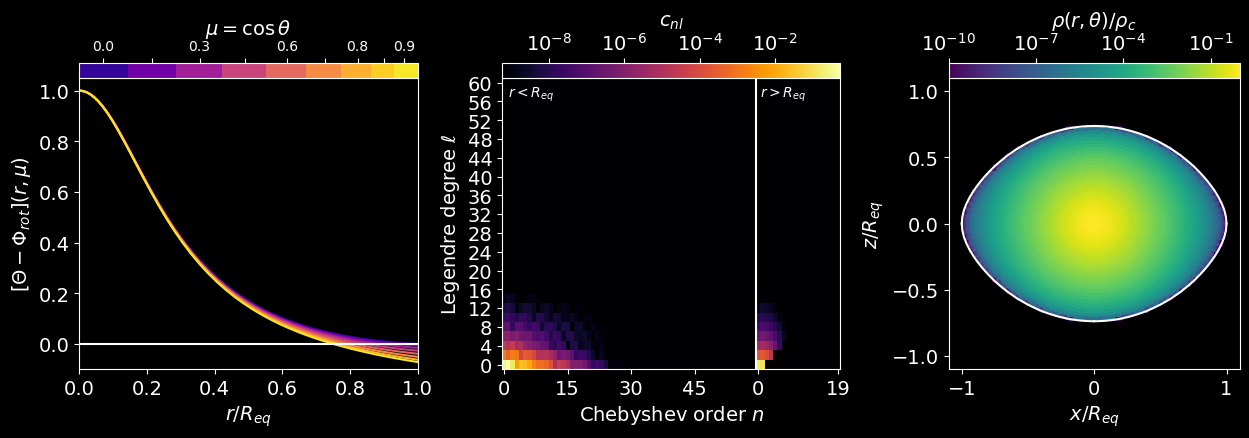

In [2]:
model.plotPolyStar(log=True, # setting to true plots density in log-scale
                   cmaps=['plasma','inferno','viridis'], # default color-maps
                   cnorm=1e9 # normalization for spectral coefficients (default 10^7)
                  )

The lefthand panel shows slices of the solution variable, $\Theta(r,\theta)$ at fixed latitude $\mu$. The middle panel shows spectral coefficients in the tensor basis expansion 

$$\Theta(r,\theta)=\sum_{n,\ell}c_{n\ell}T_n[x(r)]P_\ell(\mu=\cos\theta),$$ 

where $T_n$ and $P_\ell$ are Chebyshev and Legendre polynomials (respectively). Generally speaking, if the envelope of these coefficients does not decay to small values at the maximum $n$ and $\ell$ included, the solution may not be resolved. Please note that polyrot includes only minimal checks for resolvedness; to ensure that your model is resolved, simply repeat the calculation with larger (or smaller) Nr, No, and/or Nm.

Finally, the righthand panel shows a cross-section along the rotation axis, with the colormap indicating density, and the white line plotting the surface radius of the star. These, and other quantities are attached as attributes to the model; the docstring for class method "computePhys" includes a summary of the most physically relevant. The polyStar class also includes default methods for computing gravitational moments ("J2n" and "J2nspec").

### Differential rotation
For rigidly rotating models like the one above, the only rotation parameter that needs to be specified is a float value for the rotation rate ("Om"). Polyrot can also compute models including rotation specified as a function of cylindrical radius $R=r\sin\theta$. To compute such a model, simply supply a function of a single variable ("R") for the argument "Om" (rather than a float). Accuracy can be improved by additionally supplying functional forms for "dO" (the derivative of Om(R) with respect to R), "Phr" (the effective centrifugal potential), and "dPh" (the centrifugal potential's derivative); if these are not specified, polyrot will compute them numerically.


###########################################################
################## Initializing new model #################
###########################################################

integrating Phi_rot numerically

###########################################################
### Solving 1D Lane-Emden equation for initial solution ###
###########################################################

iter 0: lam=3.1286, dlam/lam=4.11e-02, max[resid]=3.14e+00
iter 1: lam=3.1416, dlam/lam=4.14e-03, max[resid]=5.84e-02
iter 2: lam=3.1416, dlam/lam=7.93e-06, max[resid]=1.69e-04
iter 3: lam=3.1416, dlam/lam=6.30e-11, max[resid]=9.28e-10
iter 4: lam=3.1416, dlam/lam=-6.05e-18, max[resid]=9.82e-13

###########################################################
#### Starting iteration for 2D solution incl. rotation ####
###########################################################

iter 0: lam=3.1416, dlam/lam=3.18e-01, max[resid]=3.95e+01
iter 1: lam=6.9733, dlam/lam=5.49e-01, max[resid]=1.15e+02
iter 2: 

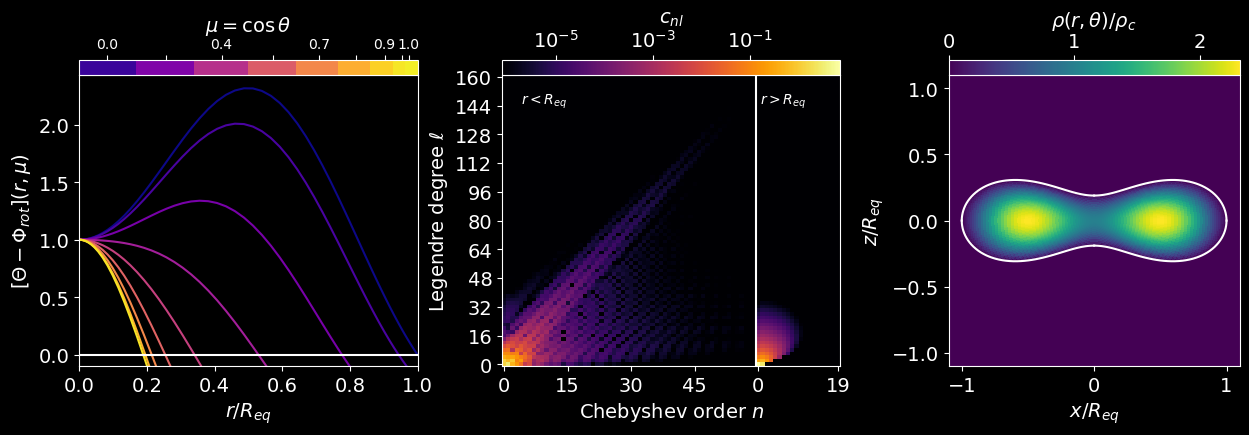

In [4]:
model = polyStar(n=1.,Nr=60,Nm=80,No=20,
                 Om=lambda R: 4./(1. + R**2), # differential rotation profile
                 dO=None, # specify dOm/dR as a function of R for more accuracy
                 Phr=None,# specify int_0^R x*Om^2dx as a funciton of R for more accuracy 
                 dPh=None,# specify dPhr/dR as a function of R for increased accuracy
                )

This model's rotation falls off with $R$, and so it is more centrifugally flattened closer to the rotation axis. Additionally, this model has a large enough ratio of kinetic to gravitational potential energy (T/|W|) to be dynamically unstable (see Dewberry, Mankovich & Fuller 2022).